In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")


In [8]:
x_l = np.load( "X.npy" )
Y_l = np.load( "y.npy" )




(-0.5, 63.5, 63.5, -0.5)

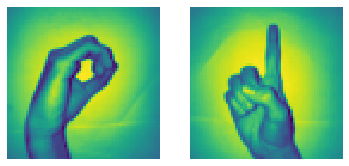

In [9]:
img_size = 64
plt.subplot( 1 ,2 ,1 )
plt.imshow( x_l[260].reshape( img_size , img_size ) )
plt.axis( "off" )
plt.subplot( 1 ,2 ,2 )
plt.imshow( x_l[900].reshape( img_size , img_size ) ) 
plt.axis( "off" )

In [10]:
x_l.shape

(2062, 64, 64)

In [11]:
Y_l.shape

(2062, 10)

- veri seti içerisin 0 dan 204'e kadar sıfır işareti , 822'den 1027'a kadarda bir işareti bulunmaktadır
- şimdi bunları ayrıştıralım 

In [12]:
X = np.concatenate( (x_l[204 : 409] , x_l[822 : 1027]) ,axis = 0 )
z = np.zeros( 205 )# 205 tane 0
o = np.ones( 205 ) # 205 tane 1
Y = np.concatenate( (z ,o) ,axis = 0 ).reshape( X.shape[0] ,1 ) 
# y değerimiz X değerlerimizin karşılığıdır 

print( "X shape " ,X.shape )
print( "Y shape"  ,Y.shape )


X shape  (410, 64, 64)
Y shape (410, 1)


### Veri setini Train - Test olarak ayırma 

In [13]:
from sklearn.model_selection import train_test_split
X_train , X_test ,y_train ,y_test  = train_test_split( X ,Y , test_size = .15 ,random_state =  42 )

In [14]:
X_train.shape[0]

348

In [15]:
X_test.shape[0]

62

In [16]:
number_of_train = X_train.shape[0]
number_of_test = X_test.shape[0]

### Train - ve test setindeki 3 boyuıtlu matrixi iki boyuta indirgeme 

In [18]:
X_train_flatten = X_train.reshape( number_of_train ,X_train.shape[1]  * X_train.shape[2] )
X_test_flatten  = X_test.reshape( number_of_test ,X_test.shape[1] * X_test.shape[2] )
print( X_train_flatten.shape )
print( X_test_flatten.shape )

(348, 4096)
(62, 4096)


<a href="http://ibb.co/bWMK7c"><img src="http://image.ibb.co/fOqCSc/3.png" alt="3" border="0"></a>

### Matrix hesaplamalarının yapılabilmesi için Transpoz alma işlemi

In [19]:
x_train = X_train_flatten.T
x_test = X_test_flatten.T
y_train = y_train.T
y_test = y_test.T

print( "X train " ,x_train.shape )
print( "x test" ,x_test.shape )
print( "y_train" ,y_train.shape )
print( "y_test"  ,y_test.shape)

X train  (4096, 348)
x test (4096, 62)
y_train (1, 348)
y_test (1, 62)


# Artificial neural Network( ANN )

- Yapay sinir agı nedir ? 
    * Temelini logistic regresyon'dan alır ve bunu en az 2 kez tekrarlar
- Logistit regresyon da giriş ve çıkış katmanları bulunurken , ANN ' de bu katmanlar arasında en az 1 gizli katman bulunur.
- Neden bu katmanın ismi Gizli Katmandır ?
    * Gizli katman girdileri görmediği için bu ismi almıştır.
- İki katmanlı agımıza bakalım ;
<a href="http://ibb.co/eF315x"><img src="http://preview.ibb.co/dajVyH/9.jpg" alt="9" border="0"></a>

- Gördüğümüz gibi giriş ve çıkış katmanının arasında 1 adaet hidden layer(gizli katman) bulunmakta ve 3 adet nodes(düğüm , öğrenme çeşitliliği) bulunmakta 
- ANN ' un nodes , learning_rate gibi bazı hiperparametreleri vardır.
- Resimde de gördüğümüz gibi Logistic fonksiyondan farklı olarak gizli katman vardır bunu geçelim birde bu gizli fonksiyonu sigmoid fonksiyondan daha iyi temsil etmek için tanh aktivasyon fonksiyonu kullanılmıştır, bunun yerine relu gibi fonksiyonlarda kullanabilirdik. Modelli öğrenme ve öğrenme hızını etkileyen faktordur 
- Tanh gizli katman cıktılarının sıfıra yakın olmasını saglayarak öğrenme hızımızı ve ogrenme oranımızı optimize eder.


### 2- Layer Neural Network (2 katmanlı ağ):
   - Size of layers and initializing parameters weights and bias
   - Forward propagation
   - Loss function and Cost Function
   - Bacward Propagation
   - Update Parameters
   - Prediction with learnt parameters weight and bias 
   - Create model
    

<br>
<br>

##  Size of layers and initializing parameters weights and bias 


- Logistic regressionda yaptıgımız weight ,bias değerlerini burdada sıfırda başlatmayacağız evt burası güzel ve burada gizli katman daki her bir nodes'in başlangiçta aynı şeyi öğrenmesini önlemek için her pixeli çarptıgımız weight katsayılarını birbirinden farklı tutacağız bu şekilde öğrenmeyi ilk adımda doğru olarak başklatmış olacagız ayrıca bu değerleri sıfıra yakın seçeceğiz çünkü tanh değere büyük seçildiği taktirde 0 ' a cok yakın olur ve biz veri setini çok geç öğreiriz
- Bias değri 0'dan başlayabilir 
- devamke :)

In [25]:
X_train.shape[1]

64

In [24]:
np.random.randn( 3 ,X_train.shape[1] )

array([[-1.06362763e-02,  5.24142459e-02, -1.52587373e+00,
        -4.18861691e-01,  2.35788598e+00, -5.44640203e-01,
        -1.39009798e+00,  1.30193241e+00,  9.70087357e-01,
        -2.77471353e+00, -2.17151149e+00,  1.95741994e-01,
        -1.22729642e-01, -5.21051549e-01, -4.33553197e-01,
        -1.21039103e-01, -9.07687581e-01, -6.20461804e-01,
        -4.78121454e-01, -2.73128288e-01, -1.48711949e-01,
         1.08350392e+00,  4.62531812e-01, -1.80748554e-01,
         5.18241971e-01,  4.31165593e-01,  3.24341546e-01,
        -3.75888943e-01, -1.20686319e+00, -6.79183861e-01,
        -5.63287745e-01, -1.24931919e+00, -6.38560056e-01,
        -5.87486210e-01,  2.47757036e-01,  6.81574364e-01,
        -1.89033735e-01,  7.55547776e-01,  1.71828212e+00,
         1.72557449e+00, -1.27967065e+00, -8.55536109e-01,
        -1.06682830e+00, -1.83713145e-01, -8.04161331e-01,
        -8.23839800e-01,  5.89152297e-01, -7.28726986e-01,
        -2.73366157e-01, -3.04262726e-02, -5.63057952e-0

In [26]:
y_train.shape[0]

1

In [68]:
def initialize_parameters_and_layer_sizes_NN(x_train, y_train):
    # buradaki 3 sayısı bizim belirlediğimiz node sayısıdır.
    parameters = {"weight1": np.random.randn(3,x_train.shape[0]) * 0.1,#3e 64luk matrix tanımlar ve biz bunu 0.1 ile ölceklendiririz 
                  "bias1": np.zeros((3,1)),
                  "weight2": np.random.randn(y_train.shape[0],3) * 0.1,# output alabilmek için 1e 3lük
                  "bias2": np.zeros((y_train.shape[0],1))}
    return parameters

<br>
<br> 

## Forward propagation
    - İleri yayılımı Logistic regression ile hemen hemen aynıdır
    - Tek farki tanh gibi aktivasyon fonksiyonu kullanmamız ve işlemleri ik kez yapmamız
    

In [69]:
# calculation of z
#z = np.dot(w.T,x_train)+b
def sigmoid(z):
    y_head = 1/(1+np.exp(-z))
    return y_head
#y_head = sigmoid(z)

In [70]:

def forward_propagation_NN(x_train, parameters):

    Z1 = np.dot(parameters["weight1"],x_train) +parameters["bias1"]# ilk önce X_train data setimize katsayı uygulayacağımız için X_traini alırız
    A1 = np.tanh(Z1)
    Z2 = np.dot(parameters["weight2"],A1) + parameters["bias2"]# sonra bu katsayıları A1 değerimize uygularız 
    A2 = sigmoid(Z2)

    cache = {"Z1": Z1,
             "A1": A1,
             "Z2": Z2,
             "A2": A2}
    
    return A2, cache


<br>
<br>

## Loss Function and Cost Function
    -los fonksiyonu logistic regression da kullanıdıgımızın aynısıdır m

In [71]:
# Cost'un hesaplanması

def compute_cost_NN(A2, Y, parameters):
    logprobs = np.multiply(np.log(A2),Y)
    cost = -np.sum(logprobs)/Y.shape[1]
    return cost



<br>
<br>
 
## Backward Propagation
    - Bilgiğimiz gibi geriye yayılım türev alma işlemidir.

In [72]:

def backward_propagation_NN(parameters, cache, X, Y):

    dZ2 = cache["A2"]-Y
    dW2 = np.dot(dZ2,cache["A1"].T)/X.shape[1]
    db2 = np.sum(dZ2,axis =1,keepdims=True)/X.shape[1]
    dZ1 = np.dot(parameters["weight2"].T,dZ2)*(1 - np.power(cache["A1"], 2))
    dW1 = np.dot(dZ1,X.T)/X.shape[1]
    db1 = np.sum(dZ1,axis =1,keepdims=True)/X.shape[1]
    grads = {"dweight1": dW1,
             "dbias1": db1,
             "dweight2": dW2,
             "dbias2": db2}
    return grads

<br>
<br>

## Update Parameters 
   

In [65]:
def update_parameters_NN(parameters, grads, learning_rate = 0.01):
    parameters = {"weight1": parameters["weight1"]-learning_rate*grads["dweight1"],
                  "bias1": parameters["bias1"]-learning_rate*grads["dbias1"],
                  "weight2": parameters["weight2"]-learning_rate*grads["dweight2"],
                  "bias2": parameters["bias2"]-learning_rate*grads["dbias2"]}
    
    return parameters

<br>
<br>

## Prediction with learnt parameters weight and bias

In [73]:
def predict_NN(parameters,x_test):
    # x_test is a input for forward propagation
    A2, cache = forward_propagation_NN(x_test,parameters)
    Y_prediction = np.zeros((1,x_test.shape[1]))
    # if z is bigger than 0.5, our prediction is sign one (y_head=1),
    # if z is smaller than 0.5, our prediction is sign zero (y_head=0),
    for i in range(A2.shape[1]):
        if A2[0,i]<= 0.5:
            Y_prediction[0,i] = 0
        else:
            Y_prediction[0,i] = 1

    return Y_prediction

<br>
<br>

## Create Model

Cost after iteration 0: 0.344556
Cost after iteration 100: 0.338902
Cost after iteration 200: 0.313158
Cost after iteration 300: 0.276539
Cost after iteration 400: 0.240279
Cost after iteration 500: 0.207921
Cost after iteration 600: 0.179729
Cost after iteration 700: 0.155921
Cost after iteration 800: 0.136461
Cost after iteration 900: 0.095239
Cost after iteration 1000: 0.108635
Cost after iteration 1100: 0.096942
Cost after iteration 1200: 0.087050
Cost after iteration 1300: 0.078651
Cost after iteration 1400: 0.071472
Cost after iteration 1500: 0.065364
Cost after iteration 1600: 0.060280
Cost after iteration 1700: 0.056054
Cost after iteration 1800: 0.052398
Cost after iteration 1900: 0.049175
Cost after iteration 2000: 0.046356
Cost after iteration 2100: 0.043901
Cost after iteration 2200: 0.041755
Cost after iteration 2300: 0.039867
Cost after iteration 2400: 0.038195


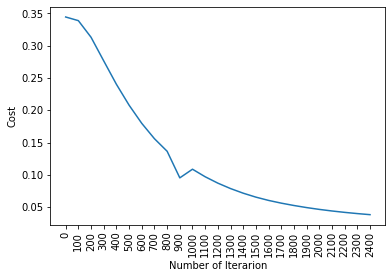

train accuracy: 99.71264367816092 %
test accuracy: 95.16129032258064 %


In [75]:
# 2 - Layer neural network
def two_layer_neural_network(x_train, y_train,x_test,y_test, num_iterations):
    cost_list = []
    index_list = []
    #initialize parameters and layer sizes
    parameters = initialize_parameters_and_layer_sizes_NN(x_train, y_train)

    for i in range(0, num_iterations):
         # forward propagation
        A2, cache = forward_propagation_NN(x_train,parameters)
        # compute cost
        cost = compute_cost_NN(A2, y_train, parameters)
         # backward propagation
        grads = backward_propagation_NN(parameters, cache, x_train, y_train)
         # update parameters
        parameters = update_parameters_NN(parameters, grads)
        
        if i % 100 == 0:
            cost_list.append(cost)
            index_list.append(i)
            print ("Cost after iteration %i: %f" %(i, cost))
    plt.plot(index_list,cost_list)
    plt.xticks(index_list,rotation='vertical')
    plt.xlabel("Number of Iterarion")
    plt.ylabel("Cost")
    plt.show()
    
    # predict
    y_prediction_test = predict_NN(parameters,x_test)
    y_prediction_train = predict_NN(parameters,x_train)

    # Print train/test Errors
    print("train accuracy: {} %".format(100 - np.mean(np.abs(y_prediction_train - y_train)) * 100))
    print("test accuracy: {} %".format(100 - np.mean(np.abs(y_prediction_test - y_test)) * 100))
    return parameters
parameters = two_layer_neural_network(x_train, y_train,x_test,y_test, num_iterations=2500)

- Bu noktaya kadar 2 katmanlı sinir ağı oluştururuz ve nasıl uygulanacağını öğreniriz * Katmanların boyutu ve parametrelerin ağırlıkları ve önyargılarının başlatılması * İleri yayılma * Kayıp fonksiyonu ve Maliyet fonksiyonu * Geriye doğru yayılma * Güncelleme Parametreleri * Öğrenilen parametrelerle tahmin ağırlık ve önyargı * Oluşturma model Şimdi keras ile L tabakası sinir ağının nasıl uygulanacağını öğrenelim.

<br>
<br>

#  L layer Neural Network

- Gizli katman sayısını arttırırsak ne olur ?
    * Öncekinden daha fazla öğrenmiş oluruz ayrıntıları öğreniriz.
    * Modelimiz basit özellikleri bir araya getirerek karmaşık yapıları öğrenebilir buna katıyı katman sayısı ve nodes saglar
    
    <a href="http://ibb.co/dNgDJH"><img src="http://preview.ibb.co/mpD4Qx/10.jpg" alt="10" border="0"></a>
    *Örneğin, ilk gizli katman kenarları veya çizgi gibi temel şekilleri öğrenir. Katman sayısı arttığında, katmanlar dışbükey şekiller veya işaret parmağı gibi karakteristik özellikler gibi daha karmaşık şeyler öğrenmeye başlar.
    

In [77]:
Modelimizi oluşturalım;
    - Bu modelimizde sırasıyla 8 ve 4 düğümlü 2 gizli katman bulunacaktır. Çünkü gizli katman ve düğüm sayısı arttığında çok fazla zaman alır.
    - Bir aktivasyon fonksiyonu olarak sırasıyla relu (birinci gizli katman), relu (ikinci gizli katman) ve sigmoid (çıkış katmanı) kullanacağız.
    - Number of iteration 100 olacaktır

SyntaxError: invalid syntax (<ipython-input-77-658cc4888047>, line 1)

#### Önce x_train, x_test, y_train ve y_test'imizi yeniden şekillendirelim.

In [78]:
# reshaping
x_train, x_test, y_train, y_test = x_train.T, x_test.T, y_train.T, y_test.T

<hr>
<hr>

# Keras Kütüphanesi ile derin öğrenme 

- Keras Kütüphanesinin bazı parametrelerine bakalım ;
    * units = gizli katmandaki node boyutu
    * kernel_initializer = agırlık başlatma parametresi
    * activation = tanh ,relu vb
    * input_dim = girdi boutu
    * optimizer = adam optimizer kullanıyoruz
        * Adam'ın bazı avantajları, nispeten düşük bellek gereksinimlerinin olması ve genellikle hiperparametrelerin az ayarlanmasıyla bile iyi çalışmasıdır.
    * metrics = dogruluk skorlayıcı
    * epochs = yineleme sayısı

In [83]:
# Evaluating the ANN
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from keras.models import Sequential # initialize neural network library
from keras.layers import Dense # build our layers library
def build_classifier():
    classifier = Sequential() # initialize neural network
    classifier.add(Dense(units = 8, kernel_initializer = 'uniform', activation = 'relu', input_dim = x_train.shape[1]))
    classifier.add(Dense(units = 4, kernel_initializer = 'uniform', activation = 'relu'))
    classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))
    classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
    return classifier
classifier = KerasClassifier(build_fn = build_classifier, epochs = 100)
accuracies = cross_val_score(estimator = classifier, X = x_train, y = y_train, cv = 3)
mean = accuracies.mean()
variance = accuracies.std()
print("Accuracy mean: "+ str(mean))
print("Accuracy variance: "+ str(variance))

Epoch 1/100
232/232 [==============================] - 0s 673us/step - loss: 0.6927 - accuracy: 0.5431
Epoch 2/100
232/232 [==============================] - 0s 60us/step - loss: 0.6917 - accuracy: 0.5431
Epoch 3/100
232/232 [==============================] - 0s 60us/step - loss: 0.6900 - accuracy: 0.5431
Epoch 4/100
232/232 [==============================] - 0s 56us/step - loss: 0.6884 - accuracy: 0.5431
Epoch 5/100
232/232 [==============================] - 0s 52us/step - loss: 0.6868 - accuracy: 0.5431
Epoch 6/100
232/232 [==============================] - 0s 60us/step - loss: 0.6859 - accuracy: 0.5431
Epoch 7/100
232/232 [==============================] - 0s 73us/step - loss: 0.6839 - accuracy: 0.5431
Epoch 8/100
232/232 [==============================] - 0s 65us/step - loss: 0.6838 - accuracy: 0.5431
Epoch 9/100
232/232 [==============================] - 0s 69us/step - loss: 0.6818 - accuracy: 0.5431
Epoch 10/100
232/232 [==============================] - 0s 69us/step - loss: 0.67